In [1]:
from numpy import sin, cos, random as rn, array
from matplotlib import pyplot as plt

In [2]:
'''
Defined Function
'''
def h(x1, x2):
    assert -1 <= x1 <= 2, 'Outside defined limit for x1!'
    assert -1 <= x2 <= 1, 'Outside defined limit for x2!'
    return cos(x1) * sin(x2) - x1 / (x2 ** 2 + 1)

In [3]:
'''
Used to decode chromosome
'''
def x(r_min, r_max, gens):
    # Checks if the condition fulfills
    assert r_min <= r_max, 'Minimum limit must be lesser than maximum limit!'
    # Add all value from gens list
    g_sum = sum(gens)
    # Fetch list length
    N = len(gens)
    # Returns x based on the defined formula
    return r_min + (r_max - r_min) * g_sum / N

In [4]:
'''
Generate chromosome based on random real number with size m,
for each population and n for the total of population
'''
def generate_population(m, n):
    # Checks if m and n is greater than zero 
    assert m > 0 and n > 0, 'Accepts positive integers!'
    # Checks if m is an even number
    assert m % 2 == 0, 'Accepts even integers!'
    return [[rn.random() for i in range(m)] for i in range(n)]

In [5]:
'''
Decode the chromosomes into two values, x1 and x2
'''
def decode(chromosome):
    # Fetch list length
    N = len(chromosome)
    # Generate x1 based on first half of the chromosome
    x1 = x(-1, 2, chromosome[0:N//2])
    # Generate x2 based on second half of the chromosome
    x2 = x(-1, 1, chromosome[N//2:N])
    # Returns both x1 and x2
    return x1, x2

In [6]:
'''
Returns minimum fitness value. If x1 and x2 is outside boundary,
then it will return 0 and determined formula if it is within.
'''
def fitness(x1, x2):
    # Checks if the values passed assertion
    try:
        # If it passes return the fitness value of f = -h
        return -h(x1, x2)
    except:
        # Returns zero if assertion fails
        return 0

In [7]:
'''
Calculate fitness of a chromosome
'''
def chromosome_fitness(chromosome):
    # Fetch x1 and x2 from decode function
    x1, x2 = decode(chromosome)
    # Returns fitness value of the chromosome
    return fitness(x1, x2)

In [8]:
'''
Evaluate fitness value of entire population
'''
def evaluate(populations):
    # Decode the populations
    population_decode = [decode(p) for p in populations]
    # Generate fitness value based on the decoded population
    chromosome_fitness = [fitness(x1, x2) for x1, x2 in population_decode]
    # Sum all the values within list of fitness values
    result = sum(chromosome_fitness) 
    # Returns the result
    return result

In [9]:
'''
Sort genes based on its fitness value
'''
def sort_population(population):
    # Sort the list based on the fitness value of each chromosomes
    return sorted(population, key=lambda chromosome: chromosome_fitness(chromosome))

In [10]:
'''
Tournament selection for selecting best parents,
it will do k iteration to find values that is
suitable based on its fitness value
'''
def selection(population, k):
    # Copies the population into a new list
    population_copy = population.copy()
    # List to place the best chromosomes
    best = []
    # Placeholder for the current best fitness within the iteration
    best_fitness = 0
    for i in range(k):
        # Generate random index with population length as its boundaries
        random_index = rn.randint(len(population_copy))
        # Individual chromosome chosen based on random index generated
        chromosome_individual = population_copy[random_index]
        # Calculated Fitness values of the selected Individual
        fitness_individual = chromosome_fitness(chromosome_individual)
        # Checks if the list is empty or the individual fitness has better value than current best fitness
        if len(best) == 0 or fitness_individual > best_fitness:
            # Removes the chromosome from the population
            population_copy.pop(random_index)
            # Inserts to the best chromosome list
            best.append(chromosome_individual)
            # Replaces the best fitness value
            best_fitness = fitness_individual
    # Returns the best chromosomes
    return best

In [11]:
'''
Crossover for population or parents
'''
def crossover(population, pc):
    # Fetch the chromosome size
    N = len(population[0])
    # List to hold the crossover result
    population_cross = []
    # Iterate until the population crossover has the same length as the current population
    while len(population_cross) < len(population):
        # Generate probability for crossover
        cross_probability = rn.randint(0, 101)
        # Fetch the current value of crossover population size
        i = len(population_cross)
        # Copies the current selected chromosome
        chromosome_new = population[i].copy()
        # Generate random index to select a random chromosome
        random_i = rn.randint(len(population))
        # Checks if the probability is within pC range and is not the same as the current index
        if cross_probability <= pc and random_i != i:
            # Copies the random chromosome value into new variable
            chromosome_random = population[random_i].copy()
            # Generate random index to crossover between
            crossover_index = rn.randint(len(chromosome_new))
            # Swaps the gen within the chosen chromosomes based on the generated random index limit
            chromosome_new[0:crossover_index], chromosome_random[0:crossover_index] = chromosome_random[0:crossover_index], chromosome_new[0:crossover_index]
            chromosome_new[crossover_index:N], chromosome_random[crossover_index:N] = chromosome_random[crossover_index:N], chromosome_new[crossover_index:N]
        # Adds the crossover result to the list
        population_cross.append(chromosome_new)
    # Return the crossover population list
    return population_cross

In [12]:
'''
Mutation for population or offspring
'''
def mutation(population, pm):
    # List to hold the mutation result
    population_mutate = []
    # Fetch the chromosome size
    N = len(population[0])
    # Iterate based on the population size
    for i in range(len(population)):
        # Generate probability of mutation
        probability_mutation = rn.randint(0, 101)
        # Copy the chromsome and places it into a variable
        chromosome = population[i].copy()
        # Checks if the probability is within pM range
        if probability_mutation <= pm:
            # Generate new random index
            random_i = rn.randint(N)
            # Place new random value within the chromosome based on random index
            chromosome[random_i] = rn.random()
        # Adds the mutation result into the list
        population_mutate.append(chromosome)
    # Returns the mutation result
    return population_mutate

In [13]:
'''
Elitism is used to fetch k chromosomes with the best fitness value
'''
def elitism(population, k):
    # Get the sorted population based on the fitness value
    population_sort = sort_population(population)
    # Returns values sorted on the highest fitness with k size
    return population_sort[-k:]

In [14]:
'''
Generational Replacement for Genetic Algorithm
'''
def generational_replacement_ga(max_count, selection_count, chromosome_count, population_count, elite_count, pc, pm):
    # Generate population
    population = generate_population(chromosome_count, population_count)
    # List to hold the entire generation fitness value
    generation_fitness = []
    # Iterate based on maximum generation count
    for i in range(max_count):
        # Evaluate and the generation fitness value to the fitness list
        generation_fitness.append(evaluate(population))
        # Generate new population based on the best chromosomes
        new_population = elitism(population, elite_count)
        # Generate new population until the size reaches the current population
        while len(new_population) < population_count:
            # Do parent selection
            parents = selection(population, selection_count)
            # Crossover with the parents
            offspring = crossover(parents, pc)
            # Mutate the offsprings
            offspring = mutation(offspring, pm)
            # Add the offsprings into the new population
            new_population.extend(offspring)
        # Replaces the old population with the new population
        population = new_population
    # Return latest generated population
    return population, generation_fitness

In [15]:
'''
Steady state replaces the population with worst fitness value
with offsprings from parent selection
'''
def steady_state(population, offspring):
    # Size of the offspring
    N = len(offspring)
    # Fetch the worst population based on fitness sorting
    population_worst = sort_population(population)[N:]
    # Iterate based on the offspring size
    for i in range(N):
        # Remove the worst chromosomes
        population.remove(population_worst[i])
        # Adds the new offsprings
        population.append(offspring[i])
    # Return the new population
    return population

In [16]:
'''
Fitness Based Steady State for Genetic Algorithm
'''
def steady_state_ga(max_count, selection_count, chromosome_count, population_count, pc, pm):
    # Generate population
    population = generate_population(chromosome_count, population_count)
    # List to hold the entire generation fitness value
    generation_fitness = []
    # Iterate based on maximum generation count
    for i in range(max_count):
        # Evaluate and the generation fitness value to the fitness list
        generation_fitness.append(evaluate(population))
        # Do parent selection
        parents = selection(population, selection_count)
        # Crossover with the parents
        offspring = crossover(parents, pc)
        # Mutate the offsprings
        offspring = mutation(parents, pm)
        # Do steady state survivor selection
        population = steady_state(population, offspring)
    # Return latest generated population
    return population, generation_fitness

In [17]:
'''
Output the result based on the defined hyperparameter
'''
def output_result(is_generational_replacement, max_count, selection_count, chromosome_count, population_count, pc, pm, elite_count = 0):
    # Generate population using steady state
    population = steady_state_ga(max_count, selection_count, chromosome_count, population_count, pc, pm)
    # Prints the defined parameter
    print('Parameters')
    print(f'Max Iteration: {max_count}')
    print(f'Selection Iteration: {selection_count}')
    print(f'Number of chromosome: {chromosome_count}')
    print(f'Number of population: {population_count}')
    # Checks if the population should be generated using generational replacement
    if is_generational_replacement:
        # Prints additional parameter for generational replacement
        print(f'Number of elites: {elite_count}')
        # Replaces the former population with the one using generational replacement
        population = generational_replacement_ga(max_count, selection_count, chromosome_count, population_count, elite_count, pc, pm)
    # Continues printing the parameters
    print(f'Crossover Probablilty: {pc}%')
    print(f'Mutation Probability: {pm}%')
    # Fetch best chromosome
    best_chromosome = max(population[0], key=lambda chromosome: chromosome_fitness(chromosome))
    # Rounds the chromosome value with 4 decimals
    best_chromosome = [round(gen, 4) for gen in best_chromosome]
    # Decodes the best chromosome
    x1, x2 = decode(best_chromosome)
    # Round x1 and x2 with 4 decimals
    x1, x2 = round(x1, 4), round(x2, 4)
    # Round the h(x1, x2) with 4 decimals
    best_result = round(h(x1, x2), 4)
    # Outputs the best chromosome values
    print('Best Result')
    print(f'{best_chromosome}, x1:{x1}, x2:{x2}, h(x1, x2):{best_result}')
    # Print the entire population and its decoded result
    print('Results')
    for chromosome in population[0]:
        chromosome = [round(gen, 4) for gen in chromosome]
        x1, x2 = decode(chromosome)
        x1, x2 = round(x1, 4), round(x2, 4)
        result = round(h(x1, x2), 4)
        print(f'{chromosome}, x1:{x1}, x2:{x2}, h(x1, x2):{result}')
    # Visualize the fitness of each generation
    plt.plot(list(range(max_count)), population[1])
    plt.title('Generational Fitness Value')
    plt.xlabel('Number of Generation (x)')
    plt.ylabel('Fitness Value of Each Generation (y)')
    plt.axvline(0, 0, color='k')
    plt.axhline(0, 0, color='k')
    plt.savefig(f'generational-{is_generational_replacement}', bbox_inches='tight')

Generational Replacement
Parameters
Max Iteration: 500
Selection Iteration: 15
Number of chromosome: 8
Number of population: 50
Number of elites: 2
Crossover Probablilty: 65%
Mutation Probability: 2%
Best Result
[0.9974, 0.9856, 0.9947, 0.9965, 0.4798, 0.6624, 0.9038, 0.1597], x1:1.9807, x2:0.1028, h(x1, x2):-2.0009
Results
[0.9974, 0.9856, 0.9947, 0.9965, 0.4798, 0.6624, 0.9038, 0.1597], x1:1.9807, x2:0.1028, h(x1, x2):-2.0009
[0.9974, 0.9856, 0.9947, 0.9965, 0.4798, 0.6624, 0.9038, 0.1597], x1:1.9807, x2:0.1028, h(x1, x2):-2.0009
[0.9974, 0.9856, 0.9947, 0.9965, 0.4798, 0.6624, 0.9038, 0.1597], x1:1.9807, x2:0.1028, h(x1, x2):-2.0009
[0.9974, 0.9856, 0.9947, 0.9965, 0.4798, 0.6624, 0.9038, 0.1597], x1:1.9807, x2:0.1028, h(x1, x2):-2.0009
[0.9974, 0.9856, 0.9947, 0.9965, 0.4798, 0.6624, 0.9038, 0.1597], x1:1.9807, x2:0.1028, h(x1, x2):-2.0009
[0.9974, 0.9856, 0.9947, 0.9965, 0.4798, 0.6624, 0.9038, 0.3519], x1:1.9807, x2:0.1989, h(x1, x2):-1.9841
[0.9974, 0.9856, 0.9947, 0.9965, 0.479

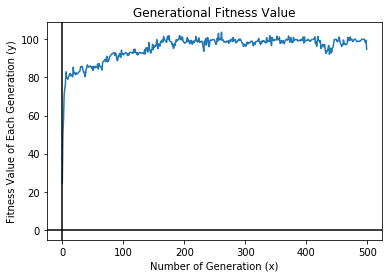

In [18]:
print('Generational Replacement')
output_result(True, 500, 15, 8, 50, 65, 2, 2)

Steady State
Parameters
Max Iteration: 500
Selection Iteration: 15
Number of chromosome: 8
Number of population: 50
Crossover Probablilty: 65%
Mutation Probability: 2%
Best Result
[0.6546, 0.8993, 0.9653, 0.819, 0.0021, 0.4754, 0.8955, 0.5507], x1:1.5036, x2:-0.0382, h(x1, x2):-1.504
Results
[0.6546, 0.8993, 0.9653, 0.819, 0.0021, 0.4754, 0.8955, 0.5507], x1:1.5036, x2:-0.0382, h(x1, x2):-1.504
[0.6546, 0.8993, 0.9653, 0.819, 0.0021, 0.4754, 0.8955, 0.5507], x1:1.5036, x2:-0.0382, h(x1, x2):-1.504
[0.6546, 0.8993, 0.9653, 0.819, 0.0021, 0.4754, 0.8955, 0.5507], x1:1.5036, x2:-0.0382, h(x1, x2):-1.504
[0.6546, 0.8993, 0.9653, 0.819, 0.0021, 0.4754, 0.8955, 0.5507], x1:1.5036, x2:-0.0382, h(x1, x2):-1.504
[0.6546, 0.8993, 0.9653, 0.819, 0.0021, 0.4754, 0.8955, 0.5507], x1:1.5036, x2:-0.0382, h(x1, x2):-1.504
[0.6546, 0.8993, 0.9653, 0.819, 0.0021, 0.4754, 0.8955, 0.5507], x1:1.5036, x2:-0.0382, h(x1, x2):-1.504
[0.6546, 0.8993, 0.9653, 0.819, 0.0021, 0.4754, 0.8955, 0.5507], x1:1.5036, x

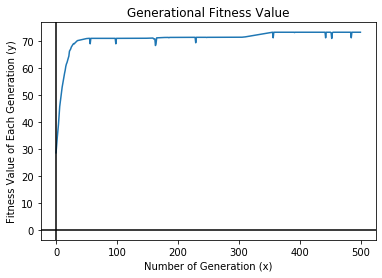

In [19]:
print('Steady State')
output_result(False, 500, 15, 8, 50, 65, 2)